# Get Data

In [1]:
%%bash 
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/kaggle.json
chmod 600 ~/.kaggle/kaggle.json
pip install kaggle
kaggle datasets download -d andrewmvd/road-sign-detection
unzip road-sign-detection.zip -d data
mv ./data/annotations ./data/labels

mkdir: cannot create directory '/c/Users/DELL/.kaggle': File exists


Defaulting to user installation because normal site-packages is not writeable
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/road-sign-detection
License(s): CC0-1.0



100%|██████████| 218M/218M [00:00<00:00, 1.02GB/s]


Archive:  road-sign-detection.zip
  inflating: data/annotations/road0.xml  
  inflating: data/annotations/road1.xml  
  inflating: data/annotations/road10.xml  
  inflating: data/annotations/road100.xml  
  inflating: data/annotations/road101.xml  
  inflating: data/annotations/road102.xml  
  inflating: data/annotations/road103.xml  
  inflating: data/annotations/road104.xml  
  inflating: data/annotations/road105.xml  
  inflating: data/annotations/road106.xml  
  inflating: data/annotations/road107.xml  
  inflating: data/annotations/road108.xml  
  inflating: data/annotations/road109.xml  
  inflating: data/annotations/road11.xml  
  inflating: data/annotations/road110.xml  
  inflating: data/annotations/road111.xml  
  inflating: data/annotations/road112.xml  
  inflating: data/annotations/road113.xml  
  inflating: data/annotations/road114.xml  
  inflating: data/annotations/road115.xml  
  inflating: data/annotations/road116.xml  
  inflating: data/annotations/road117.xml  
  in

# Setup Yolov5

In [2]:
%%bash
git clone https://github.com/ultralytics/yolov5
cd yolov5 
pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.


Defaulting to user installation because normal site-packages is not writeable


In [3]:
from preprocessing import convert_voc_to_yolo

In [4]:
convert_voc_to_yolo()

In [9]:
%%bash
cp yolov5/data/VOC.yaml yolov5/VOC.yaml 

In [10]:
# # Write out this YAML
# path: ../data
# train: # train images (relative to 'path')  16551 images
#   - images
# val: # val images (relative to 'path')  4952 images
#   - images

# # Classes
# names:
#   0: trafficlight
#   1: speedlimit
#   2: crosswalk
#   3: stop

# Get Stuff Up and Running

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
import os 

In [ ]:
%%bash
cd yolov5 
# python train.py --img 320 --batch 16 --epochs 500 --data VOC.yaml --weights yolov5s.pt --workers 2
python train.py --img 320 --batch 16 --epochs 200 --data VOC.yaml --weights runs/train/exp/weights/last.pt --resume

train: weights=runs/train/exp/weights/last.pt, cfg=, data=VOC.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'D:\DrowsyApp\New': No such file or directory
YOLOv5  2025-7-9 Python-3.12.5 torch-2.5.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='D:/DrowsyApp/New folder/Trraffic-Sign-Detector/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\DELL/.cache\torch\hub\master.zip
YOLOv5  2025-7-10 Python-3.12.5 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\DELL/.cache\torch\hub\ultralytics_yolov5_master\models\comm

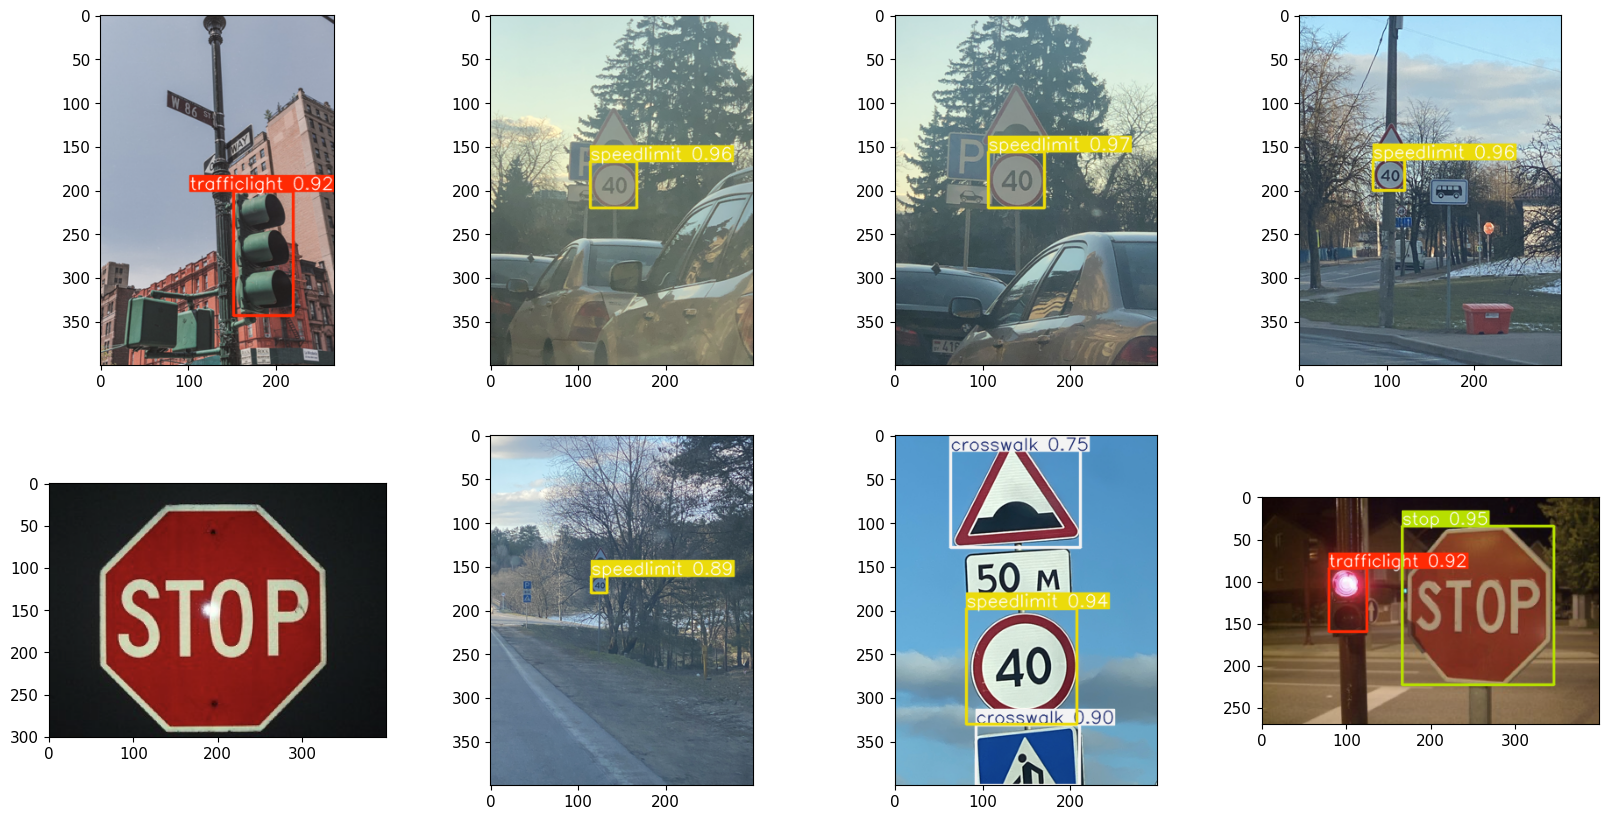

In [10]:
%matplotlib inline
fig, ax = plt.subplots(2,4, figsize=(20,10))
imgs = os.listdir('./data/images')

for idx in itertools.product(range(2),range(4)): 
    imgname = np.random.choice(imgs)
    img = cv2.imread(f'./data/images/{imgname}')
    results = model(img)
    ax[idx[0],idx[1]].imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))